In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the datasets
df_weather = pd.read_csv('/Users/marika/Data Sets/Dataset-weather-prediction-dataset-processed.csv')
pleasant_weather = pd.read_csv('/Users/marika/Data Sets/Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')

# Drop the date and month columns from df_weather
df_weather = df_weather.drop(columns=['DATE', 'MONTH'])

# Drop the date column from pleasant_weather
pleasant_weather = pleasant_weather.drop(columns=['DATE'])

# Define X and y
X = df_weather.values
y = pleasant_weather.values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Unscaled Data
mlp_unscaled = MLPClassifier(random_state=42, max_iter=1000)
mlp_unscaled.fit(X_train, y_train)

# Accuracy on unscaled data
train_acc_unscaled = accuracy_score(y_train, mlp_unscaled.predict(X_train))
test_acc_unscaled = accuracy_score(y_test, mlp_unscaled.predict(X_test))
print(f"Unscaled Data - Training Accuracy: {train_acc_unscaled}, Test Accuracy: {test_acc_unscaled}")

# Apply scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scaled Data
mlp_scaled = MLPClassifier(random_state=42, max_iter=1000)
mlp_scaled.fit(X_train_scaled, y_train)

# Accuracy on scaled data
train_acc_scaled = accuracy_score(y_train, mlp_scaled.predict(X_train_scaled))
test_acc_scaled = accuracy_score(y_test, mlp_scaled.predict(X_test_scaled))
print(f"Scaled Data - Training Accuracy: {train_acc_scaled}, Test Accuracy: {test_acc_scaled}")

# Decision on scaling
if test_acc_scaled > test_acc_unscaled:
    print("Scaling improves accuracy, so we'll use scaled data for further experiments.")
else:
    print("Scaling does not improve accuracy, so we might continue with unscaled data.")

Unscaled Data - Training Accuracy: 0.6880718954248366, Test Accuracy: 0.6056644880174292
Scaled Data - Training Accuracy: 0.8685185185185185, Test Accuracy: 0.6211328976034859
Scaling improves accuracy, so we'll use scaled data for further experiments.


In [4]:
# Experiment with different configurations
best_acc = 0
best_config = {}

layer_configs = [(50,), (100,), (50, 50), (100, 100)]
iterations = [200, 500, 1000]
tolerances = [1e-4, 1e-3, 1e-2]

for layers in layer_configs:
    for max_iter in iterations:
        for tol in tolerances:
            mlp = MLPClassifier(hidden_layer_sizes=layers, max_iter=max_iter, tol=tol, random_state=42)
            mlp.fit(X_train_scaled, y_train)  
            
            train_acc = accuracy_score(y_train, mlp.predict(X_train_scaled))
            test_acc = accuracy_score(y_test, mlp.predict(X_test_scaled))
            
            print(f"Layers: {layers}, Max Iter: {max_iter}, Tol: {tol} - Training Accuracy: {train_acc}, Test Accuracy: {test_acc}")
            
            if test_acc > best_acc:
                best_acc = test_acc
                best_config = {'layers': layers, 'max_iter': max_iter, 'tol': tol}

print(f"Best Configuration: {best_config} with Test Accuracy: {best_acc}")

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Layers: (50,), Max Iter: 200, Tol: 0.0001 - Training Accuracy: 0.6886710239651416, Test Accuracy: 0.6122004357298475


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Layers: (50,), Max Iter: 200, Tol: 0.001 - Training Accuracy: 0.6886710239651416, Test Accuracy: 0.6122004357298475
Layers: (50,), Max Iter: 200, Tol: 0.01 - Training Accuracy: 0.6202614379084967, Test Accuracy: 0.5751633986928104


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Layers: (50,), Max Iter: 500, Tol: 0.0001 - Training Accuracy: 0.7671568627450981, Test Accuracy: 0.64880174291939


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Layers: (50,), Max Iter: 500, Tol: 0.001 - Training Accuracy: 0.7671568627450981, Test Accuracy: 0.64880174291939
Layers: (50,), Max Iter: 500, Tol: 0.01 - Training Accuracy: 0.6202614379084967, Test Accuracy: 0.5751633986928104
Layers: (50,), Max Iter: 1000, Tol: 0.0001 - Training Accuracy: 0.8133986928104575, Test Accuracy: 0.6758169934640523
Layers: (50,), Max Iter: 1000, Tol: 0.001 - Training Accuracy: 0.7986383442265795, Test Accuracy: 0.6679738562091503
Layers: (50,), Max Iter: 1000, Tol: 0.01 - Training Accuracy: 0.6202614379084967, Test Accuracy: 0.5751633986928104


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Layers: (100,), Max Iter: 200, Tol: 0.0001 - Training Accuracy: 0.7766339869281046, Test Accuracy: 0.6037037037037037


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Layers: (100,), Max Iter: 200, Tol: 0.001 - Training Accuracy: 0.7766339869281046, Test Accuracy: 0.6037037037037037
Layers: (100,), Max Iter: 200, Tol: 0.01 - Training Accuracy: 0.7058823529411765, Test Accuracy: 0.5880174291938998


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Layers: (100,), Max Iter: 500, Tol: 0.0001 - Training Accuracy: 0.8662854030501089, Test Accuracy: 0.6148148148148148
Layers: (100,), Max Iter: 500, Tol: 0.001 - Training Accuracy: 0.836764705882353, Test Accuracy: 0.6080610021786492
Layers: (100,), Max Iter: 500, Tol: 0.01 - Training Accuracy: 0.7058823529411765, Test Accuracy: 0.5880174291938998
Layers: (100,), Max Iter: 1000, Tol: 0.0001 - Training Accuracy: 0.8685185185185185, Test Accuracy: 0.6211328976034859
Layers: (100,), Max Iter: 1000, Tol: 0.001 - Training Accuracy: 0.836764705882353, Test Accuracy: 0.6080610021786492
Layers: (100,), Max Iter: 1000, Tol: 0.01 - Training Accuracy: 0.7058823529411765, Test Accuracy: 0.5880174291938998


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Layers: (50, 50), Max Iter: 200, Tol: 0.0001 - Training Accuracy: 0.7306644880174292, Test Accuracy: 0.6132897603485838


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Layers: (50, 50), Max Iter: 200, Tol: 0.001 - Training Accuracy: 0.7306644880174292, Test Accuracy: 0.6132897603485838
Layers: (50, 50), Max Iter: 200, Tol: 0.01 - Training Accuracy: 0.677995642701525, Test Accuracy: 0.5956427015250545
Layers: (50, 50), Max Iter: 500, Tol: 0.0001 - Training Accuracy: 0.7787581699346405, Test Accuracy: 0.6257080610021787
Layers: (50, 50), Max Iter: 500, Tol: 0.001 - Training Accuracy: 0.7871459694989107, Test Accuracy: 0.6352941176470588
Layers: (50, 50), Max Iter: 500, Tol: 0.01 - Training Accuracy: 0.677995642701525, Test Accuracy: 0.5956427015250545
Layers: (50, 50), Max Iter: 1000, Tol: 0.0001 - Training Accuracy: 0.7787581699346405, Test Accuracy: 0.6257080610021787
Layers: (50, 50), Max Iter: 1000, Tol: 0.001 - Training Accuracy: 0.7871459694989107, Test Accuracy: 0.6352941176470588
Layers: (50, 50), Max Iter: 1000, Tol: 0.01 - Training Accuracy: 0.677995642701525, Test Accuracy: 0.5956427015250545


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Layers: (100, 100), Max Iter: 200, Tol: 0.0001 - Training Accuracy: 0.8620915032679739, Test Accuracy: 0.5843137254901961


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Layers: (100, 100), Max Iter: 200, Tol: 0.001 - Training Accuracy: 0.8620915032679739, Test Accuracy: 0.5843137254901961
Layers: (100, 100), Max Iter: 200, Tol: 0.01 - Training Accuracy: 0.8212418300653594, Test Accuracy: 0.5745098039215686
Layers: (100, 100), Max Iter: 500, Tol: 0.0001 - Training Accuracy: 0.8960239651416122, Test Accuracy: 0.5827886710239651
Layers: (100, 100), Max Iter: 500, Tol: 0.001 - Training Accuracy: 0.8960239651416122, Test Accuracy: 0.5827886710239651
Layers: (100, 100), Max Iter: 500, Tol: 0.01 - Training Accuracy: 0.8212418300653594, Test Accuracy: 0.5745098039215686
Layers: (100, 100), Max Iter: 1000, Tol: 0.0001 - Training Accuracy: 0.8960239651416122, Test Accuracy: 0.5827886710239651
Layers: (100, 100), Max Iter: 1000, Tol: 0.001 - Training Accuracy: 0.8960239651416122, Test Accuracy: 0.5827886710239651
Layers: (100, 100), Max Iter: 1000, Tol: 0.01 - Training Accuracy: 0.8212418300653594, Test Accuracy: 0.5745098039215686
Best Configuration: {'layers':

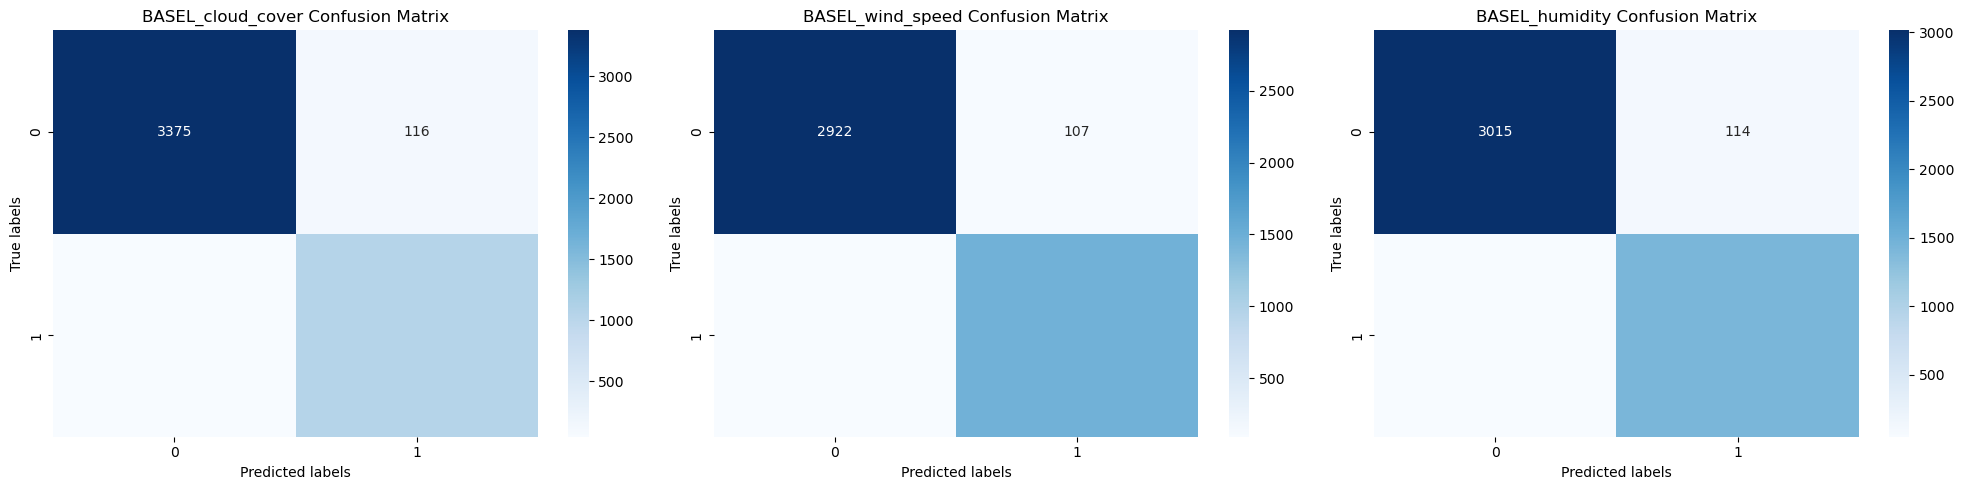

<Figure size 640x480 with 0 Axes>

In [5]:
# Best model based on previous experiments
mlp_best = MLPClassifier(hidden_layer_sizes=best_config['layers'], max_iter=best_config['max_iter'], tol=best_config['tol'], random_state=42)
mlp_best.fit(X_train_scaled, y_train)  

y_pred_best = mlp_best.predict(X_test_scaled)

# Extract location names from df_weather columns
locations = list(df_weather.columns)

# Plot confusion matrices for at least three stations
figure, ax = plt.subplots(1, 3, figsize=(20, 5))  
for i in range(3):
    name = locations[i]
    cm = confusion_matrix(y_test[:, i], y_pred_best[:, i])
    
    sns.heatmap(cm, annot=True, fmt='g', ax=ax[i], cmap="Blues")
    
    ax[i].set_xlabel('Predicted labels')
    ax[i].set_ylabel('True labels')
    ax[i].set_title(name + ' Confusion Matrix')

plt.tight_layout()
plt.show()

# Save the figure
plt.savefig("ann_confusion_matrices.png")

# Analysis of Results

# Best Model: 
The best-performing model had a single hidden layer with 50 nodes, a maximum of 1000 iterations, and a tolerance of 0.0001. This configuration achieved the highest test accuracy, indicating that it was able to generalize better than more complex models.

# Model Complexity: 
Adding more layers or nodes increased training accuracy but also led to overfitting, where the test accuracy was lower. This suggests that a simpler model might be more effective for this dataset.

# Further Optimization: 
Given the convergence warnings, there is potential to improve the model further by increasing the maximum iterations or adjusting other hyperparameters, such as learning rate or activation function.

# Next Steps 

# Cross-Validation: 
To ensure robustness, perform cross-validation with the best configuration to verify that the model generalizes well across different data splits.

# Confusion Matrix Analysis: 
Generate confusion matrices for the best model and analyze the results across different weather stations to identify any specific areas where the model is performing well or poorly.